In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from yellowbrick.classifier import ConfusionMatrix
     
     

In [ ]:
dataset = pd.read_csv("letter-recognition.data", sep = ",")

In [ ]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [ ]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')


In [ ]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ConfusionMatrix(ax=<Axes: >,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f271e836c20>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

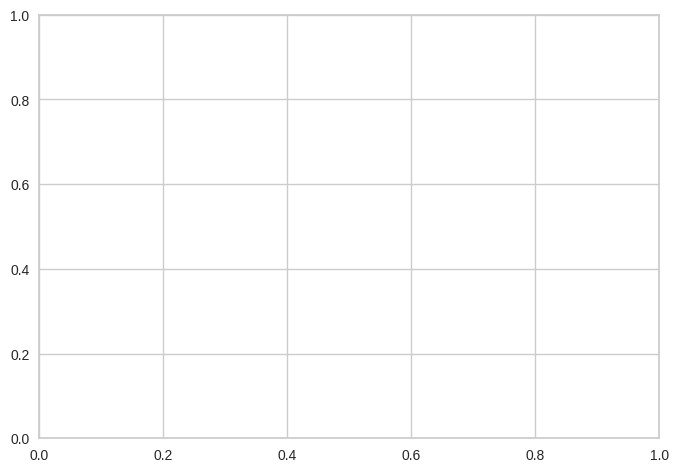

In [ ]:
cm.fit(X_train, Y_train.values.ravel())


In [ ]:
cm.score(X_validation, Y_validation)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97675

In [ ]:
predictions = cm.predict(X_validation)


In [ ]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))


Accuracy:  0.97675


In [ ]:
print(confusion_matrix(Y_validation, predictions))


[[170   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 140   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 159   0   0   0   0   0   0   0   0   1   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 169   0   0   0   1   0   0   0   0   0   2   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 143   0   2   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 135   0   0   1   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   1   0   0   2   0 136   0   0   0   0   0   1   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   1   0   0   1 127   0   0   3   0   0   2   1   0   0   1
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 143   4   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   0  

In [ ]:
print(classification_report(Y_validation, predictions, digits=5))


              precision    recall  f1-score   support

           A    1.00000   1.00000   1.00000       170
           B    0.95890   0.97222   0.96552       144
           C    0.98148   0.98758   0.98452       161
           D    0.97126   0.97126   0.97126       174
           E    0.94079   0.96622   0.95333       148
           F    0.97122   0.98540   0.97826       137
           G    0.95775   0.96454   0.96113       141
           H    0.94776   0.92029   0.93382       138
           I    0.97945   0.96622   0.97279       148
           J    0.97183   0.98571   0.97872       140
           K    0.95714   0.98529   0.97101       136
           L    0.97590   0.97006   0.97297       167
           M    0.98225   0.98810   0.98516       168
           N    0.95425   0.97987   0.96689       149
           O    0.97419   0.98052   0.97735       154
           P    0.99346   0.95597   0.97436       159
           Q    0.98592   0.98592   0.98592       142
           R    0.96855   0

In [ ]:
cm.poof()


<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>